In [3]:
import pandas as pd
import numpy as np

In [5]:
#DATA PREPROCESSING

In [7]:
df = pd.read_csv('emails.csv')

In [8]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [9]:
num_duplicates = df.duplicated().sum()
print("Number of duplicates across all columns:", num_duplicates)

Number of duplicates across all columns: 0


In [11]:
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

total_null_values = df.isnull().sum().sum()
print("\nTotal number of null values in the DataFrame:", total_null_values)

Number of null values in each column:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

Total number of null values in the DataFrame: 0


In [13]:
df = pd.concat([df.iloc[:, :21], df.iloc[:, -1]], axis=1)

print("DataFrame with only the first 21 columns and the last column:")
print(df)

DataFrame with only the first 21 columns and the last column:
       Email No.  the  to  ect  and  for  of    a  you  hou  ...  is  this  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...   1     0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...  13     0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...   0     0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...   9     2   
4        Email 5    7   6   17    1    5   2   57    0    9  ...   2     2   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...  ..   ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...   1     0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...   6     3   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...   3     1   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...   7     1   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...   5     4   

 

In [17]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,is,this,enron,i,be,that,will,have,with,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,1,0,0,2,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,13,0,1,61,4,2,0,0,2,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,8,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,9,2,0,16,2,0,0,1,1,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,2,2,0,30,8,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,1,0,0,20,1,0,0,1,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,6,3,1,98,10,6,2,2,6,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,3,1,0,10,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,7,1,0,39,1,0,0,0,2,1


In [19]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
for            int64
of             int64
a              int64
you            int64
hou            int64
in             int64
on             int64
is             int64
this           int64
enron          int64
i              int64
be             int64
that           int64
will           int64
have           int64
with           int64
Prediction     int64
dtype: object

In [21]:
#DATA EXPLORATION

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

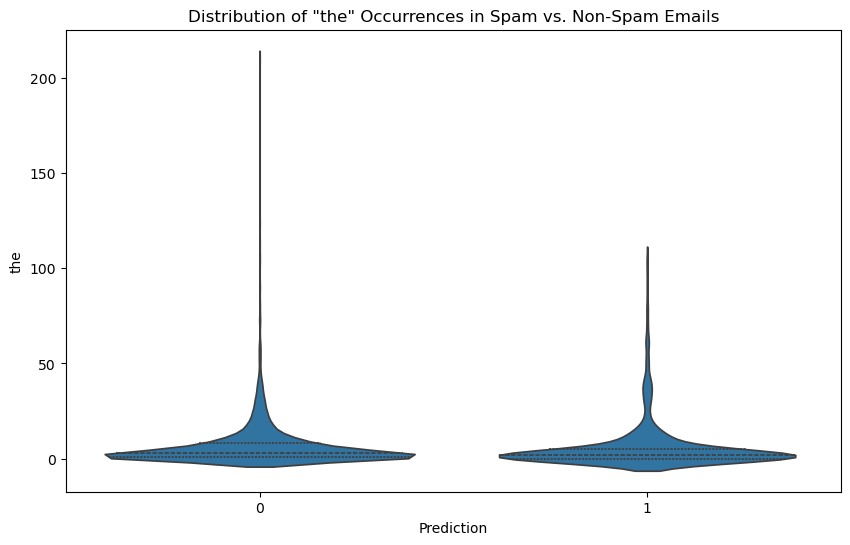

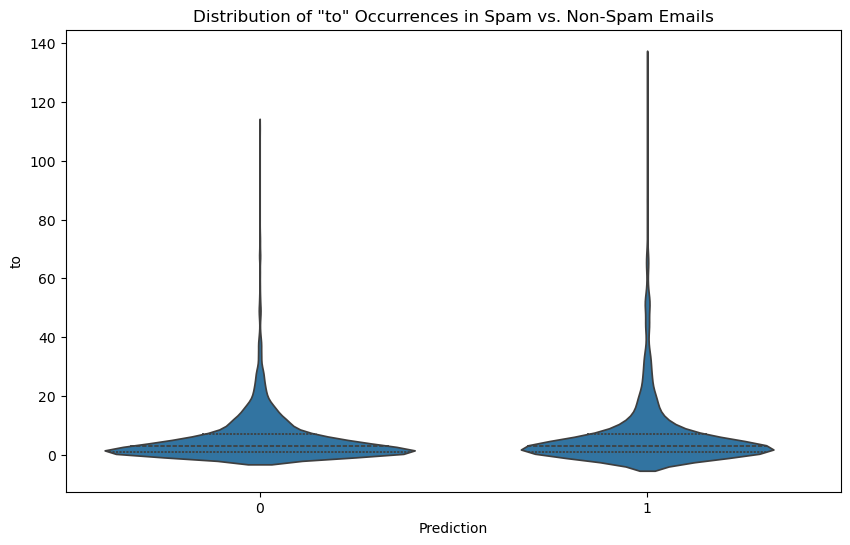

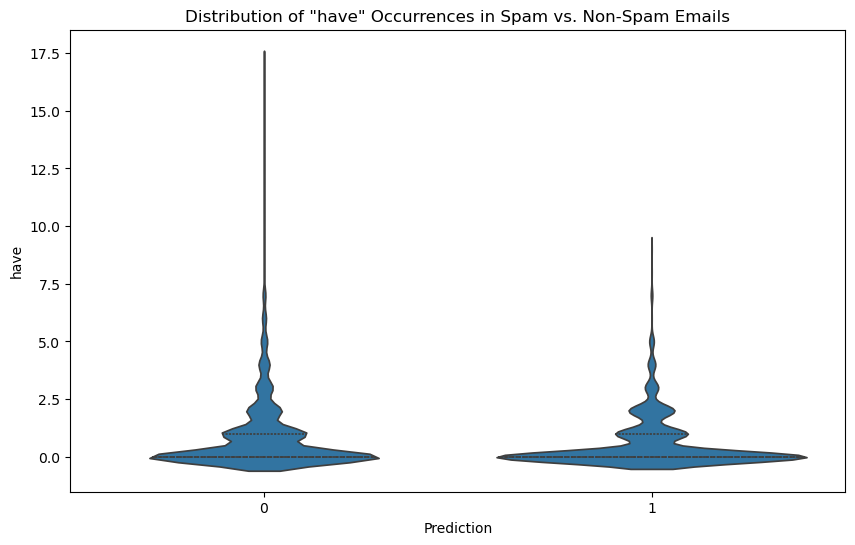

In [24]:
words = ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in', 'on', 'is', 'this', 'enron', 'i', 'be', 'that', 'will', 'have', 'with']
word_columns = df.drop(columns=['Email No.', 'Prediction'])
spam_words = word_columns[df['Prediction'] == 'spam'].sum().sort_values(ascending=False)
top_spam_words = spam_words.head(3).index.tolist()
for word in top_spam_words:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Prediction', y=word, data=df, inner="quart")
    plt.title(f'Distribution of "{word}" Occurrences in Spam vs. Non-Spam Emails')
    plt.show()

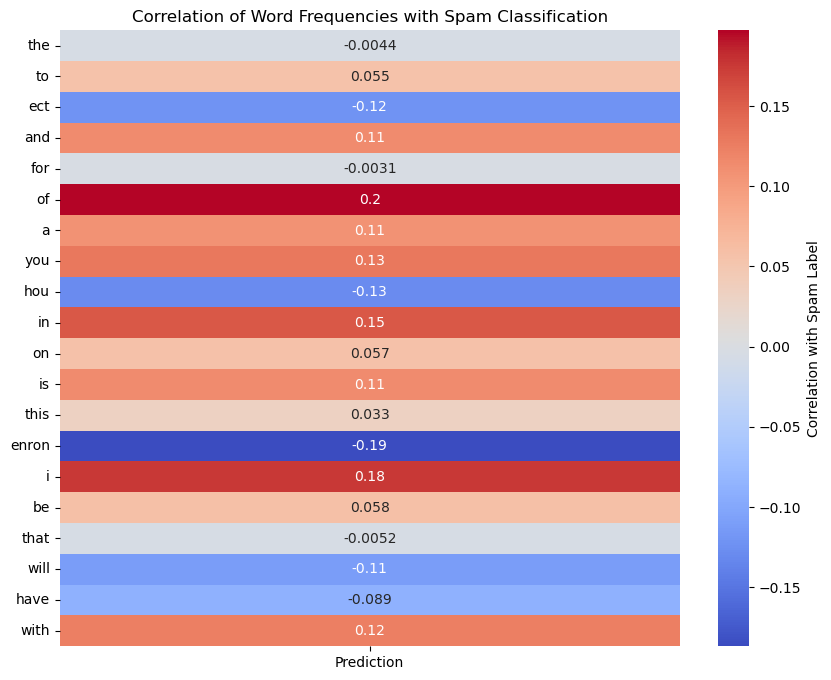

In [26]:
numeric_df = df.select_dtypes(include=['number'])

correlation = numeric_df.corr()['Prediction'].drop('Prediction')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation with Spam Label'})
plt.title("Correlation of Word Frequencies with Spam Classification")
plt.show()


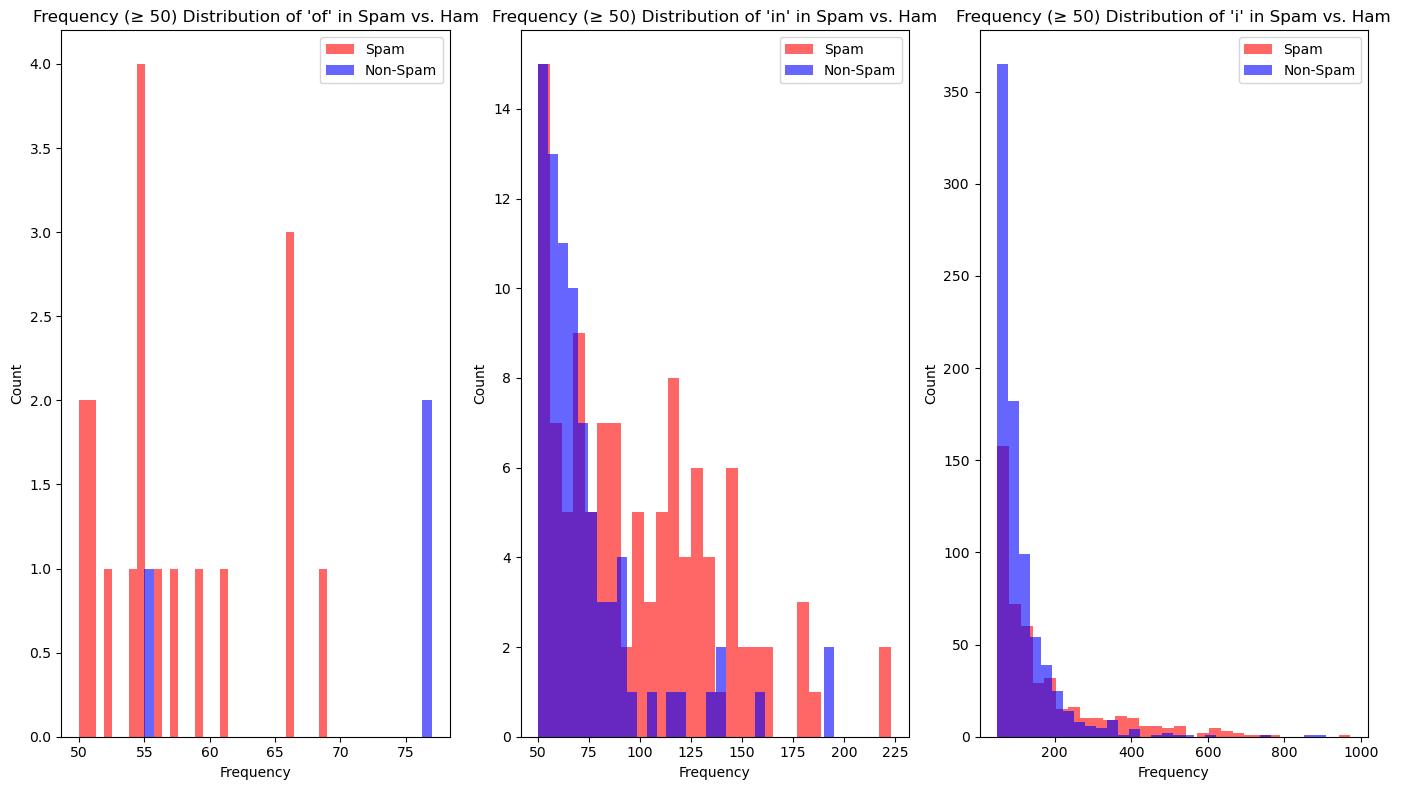

In [68]:
spam = df[df['Prediction'] == 1]  # Spam emails
non_spam = df[df['Prediction'] == 0]
numeric_df = df.select_dtypes(include=['number'])

correlation = numeric_df.corr()['Prediction'].drop('Prediction')
selected_words = correlation[correlation >= 0.15].index.tolist()
min_frequency = 50

plt.figure(figsize=(14, 8))
for i, word in enumerate(selected_words, 1):
    plt.subplot(1, len(selected_words), i)
    
    spam_high_freq = spam[spam[word] >= min_frequency][word]
    non_spam_high_freq = non_spam[non_spam[word] >= min_frequency][word]
    
    plt.hist(spam_high_freq, bins=30, alpha=0.6, label="Spam", color='red')
    plt.hist(non_spam_high_freq, bins=30, alpha=0.6, label="Non-Spam", color='blue')
    
    plt.title(f"Frequency (≥ 50) Distribution of '{word}' in Spam vs. Ham")
    plt.xlabel("Frequency")
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

In [29]:
#RANDOM FOREST CLASSIFIER

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [32]:
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8975515463917526

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1097
           1       0.85      0.79      0.82       455

    accuracy                           0.90      1552
   macro avg       0.88      0.87      0.87      1552
weighted avg       0.90      0.90      0.90      1552



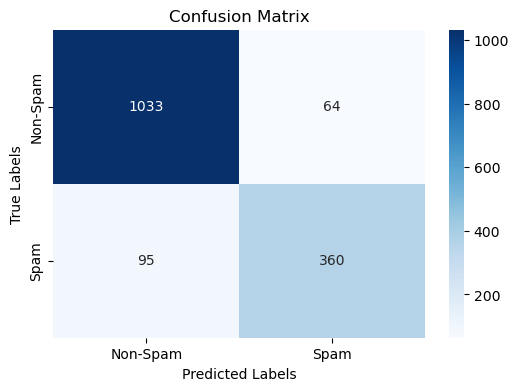

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [43]:
#DECISION TREE CLASSIFIER

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [47]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

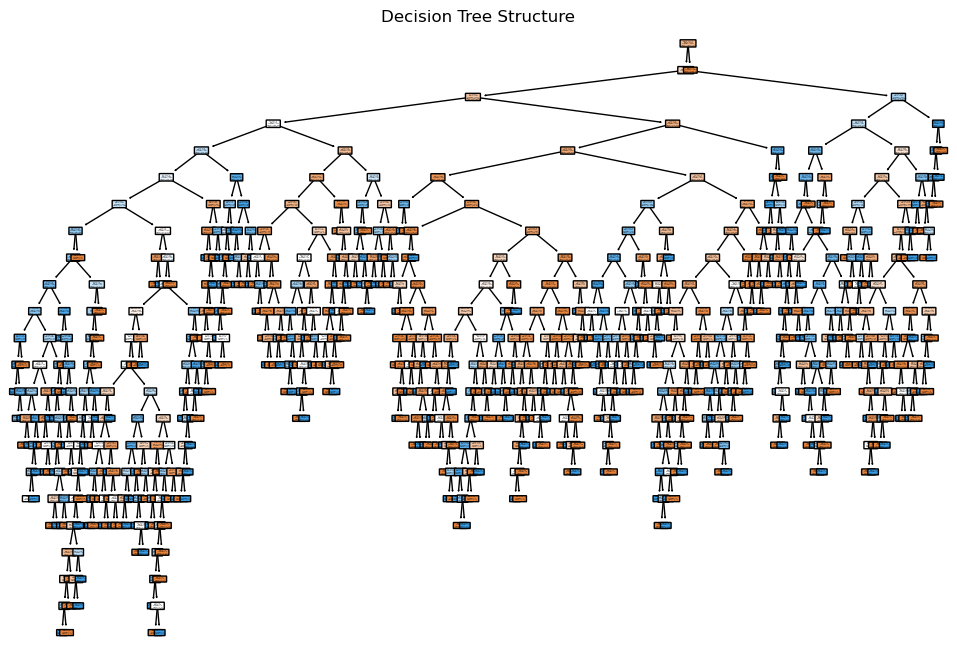

In [49]:
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Non-Spam', 'Spam'], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [50]:
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8524484536082474

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1097
           1       0.74      0.77      0.75       455

    accuracy                           0.85      1552
   macro avg       0.82      0.83      0.82      1552
weighted avg       0.85      0.85      0.85      1552



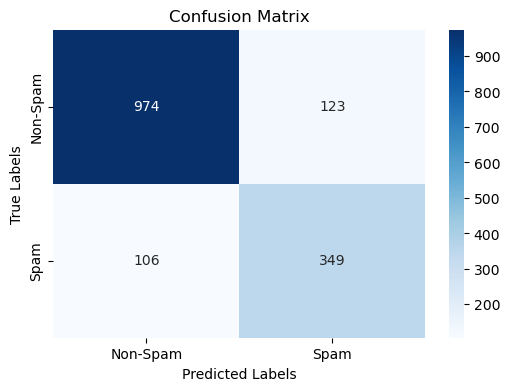

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [52]:
#LOGISTIC REGRESSION CLASSIFIER

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

In [54]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [55]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8646907216494846

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1097
           1       0.85      0.65      0.74       455

    accuracy                           0.86      1552
   macro avg       0.86      0.80      0.82      1552
weighted avg       0.86      0.86      0.86      1552



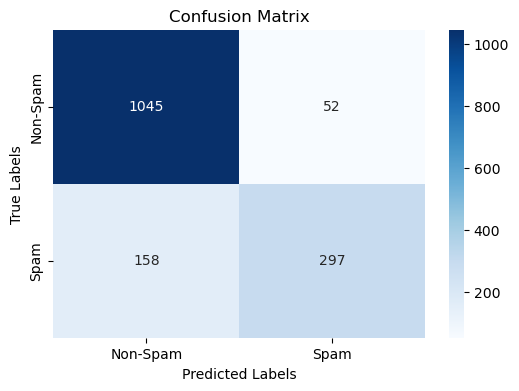

In [56]:
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()